In [266]:
#https://www.youtube.com/watch?v=e8Yw4alG16Q
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6

In [314]:
dataset = pd.read_csv("Confirmed - copy.csv")
dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)
data = dataset.set_index(['Date'])
data = data[['MH']]
data["MH"] = data["MH"].fillna(0)

In [315]:
from datetime import datetime
data.tail()

,MH
Date,
2020-04-24,390
2020-04-25,811
2020-04-26,440
2020-04-27,522
2020-04-28,728


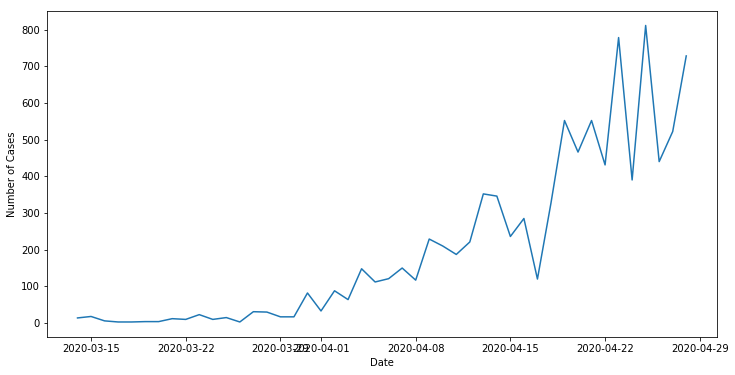

In [316]:
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.plot(data)

In [317]:
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()
print(rolmean, rolstd)

                    MH
Date                  
2020-03-14         NaN
2020-03-15         NaN
2020-03-16         NaN
2020-03-17         NaN
2020-03-18         NaN
2020-03-19         NaN
2020-03-20         NaN
2020-03-21         NaN
2020-03-22         NaN
2020-03-23         NaN
2020-03-24         NaN
2020-03-25   10.166667
2020-03-26    9.250000
2020-03-27   10.333333
2020-03-28   12.333333
2020-03-29   13.500000
2020-03-30   14.666667
2020-03-31   21.166667
2020-04-01   23.583333
2020-04-02   29.916667
2020-04-03   34.416667
2020-04-04   44.833333
2020-04-05   53.333333
2020-04-06   62.166667
2020-04-07   74.416667
2020-04-08   81.583333
2020-04-09   98.166667
2020-04-10  114.250000
2020-04-11  128.416667
2020-04-12  140.000000
2020-04-13  166.583333
2020-04-14  188.083333
2020-04-15  202.416667
2020-04-16  213.833333
2020-04-17  214.500000
2020-04-18  231.666667
2020-04-19  265.166667
2020-04-20  294.250000
2020-04-21  321.166667
2020-04-22  339.583333
2020-04-23  388.833333
2020-04-24 

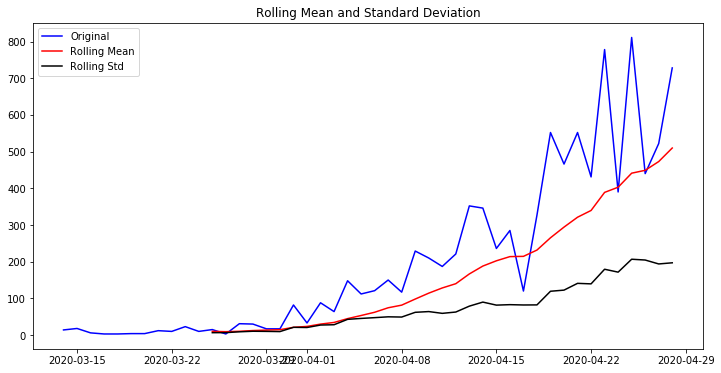

In [318]:
orig = plt.plot(data, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

In [319]:
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-Fuller Test:")
dftest = adfuller(data['MH'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  1.770207
p-value                         0.998288
#Lags Used                     10.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64


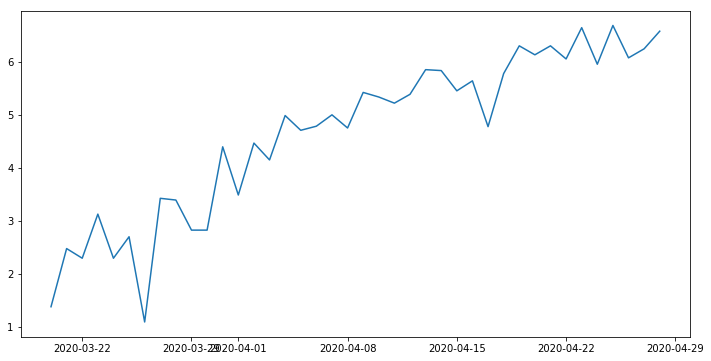

In [320]:
data_logScale = np.log(data)
data_logScale = data_logScale[6:]
plt.plot(data_logScale)

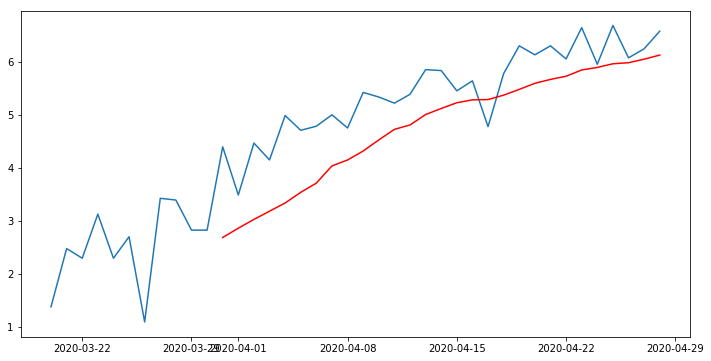

In [321]:
movingAverage = data_logScale.rolling(window=12).mean()
movingSTD = data_logScale.rolling(window=12).std()
plt.plot(data_logScale)
plt.plot(movingAverage, color='red')

In [322]:
datasetLogScaleMinusMovingAverage = data_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,MH
Date,
2020-03-31,1.712814
2020-04-01,0.626752
2020-04-02,1.441545
2020-04-03,0.968400
2020-04-04,1.651586
2020-04-05,1.171546
2020-04-06,1.074860
2020-04-07,0.963702
2020-04-08,0.604559


In [323]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(data):
    movingAverage = data.rolling(window=12).mean()
    movingSTD = data.rolling(window=12).std()
    
    orig = plt.plot(data, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block=False)

    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(data, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

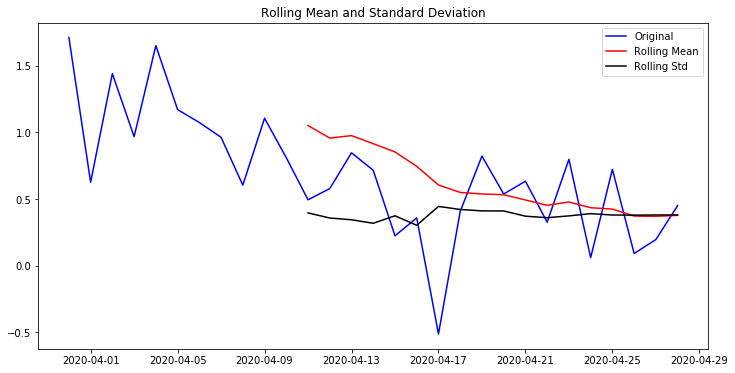

Results of Dickey-Fuller Test:
Test Statistic                 -3.930945
p-value                         0.001819
#Lags Used                      0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


In [324]:
test_stationary(datasetLogScaleMinusMovingAverage)

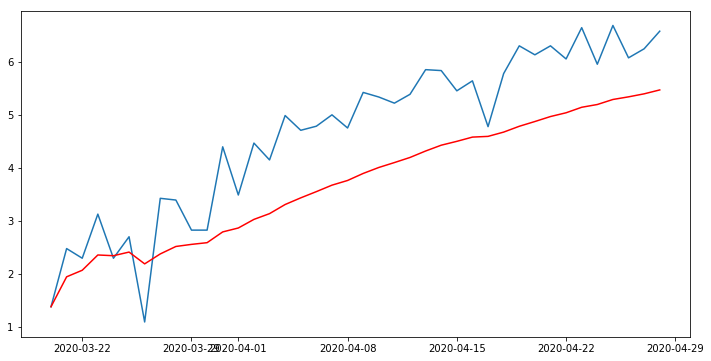

In [325]:
exponentialDecayWeightedAverage = data_logScale.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(data_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

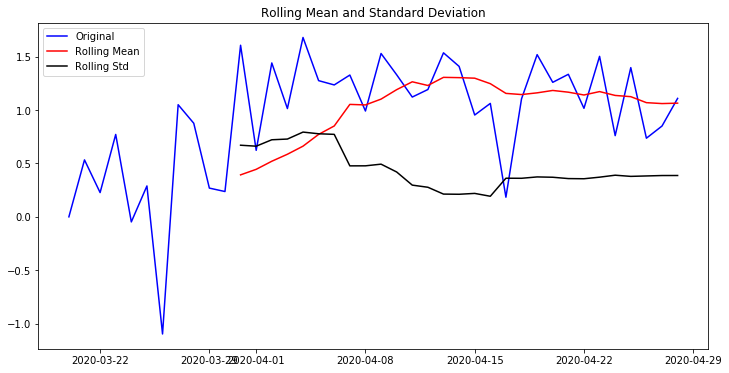

Results of Dickey-Fuller Test:
Test Statistic                 -4.667597
p-value                         0.000097
#Lags Used                      0.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


In [326]:
datasetLogScaleMinusMovingExponentialDecayAverage = data_logScale - exponentialDecayWeightedAverage
datasetLogScaleMinusMovingExponentialDecayAverage = datasetLogScaleMinusMovingExponentialDecayAverage.dropna()
test_stationary(datasetLogScaleMinusMovingExponentialDecayAverage)

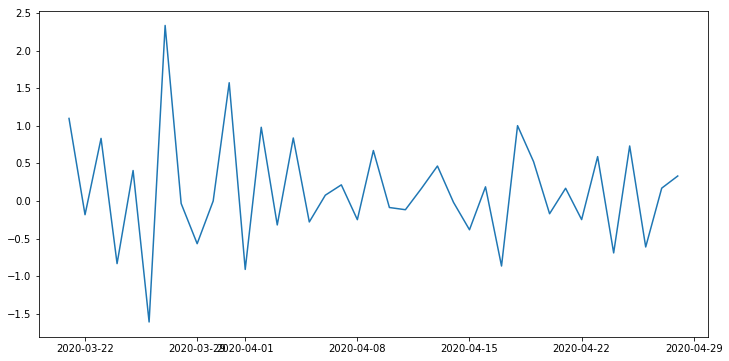

In [327]:
datasetLogDiffShifting = data_logScale - data_logScale.shift()
plt.plot(datasetLogDiffShifting)

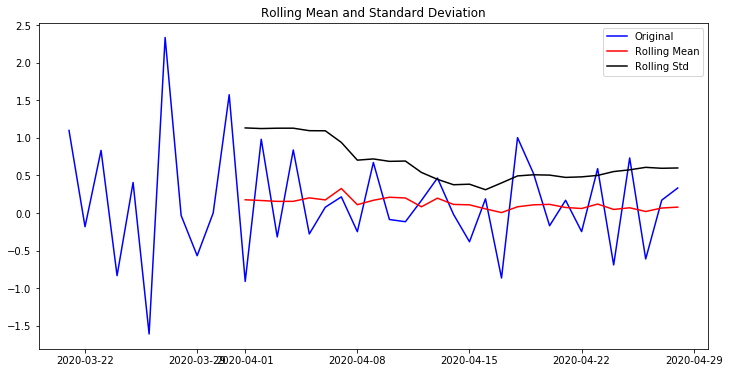

Results of Dickey-Fuller Test:
Test Statistic                -1.211495e+01
p-value                        1.881760e-22
#Lags Used                     0.000000e+00
Number of Observations Used    3.800000e+01
Critical Value (1%)           -3.615509e+00
Critical Value (5%)           -2.941262e+00
Critical Value (10%)          -2.609200e+00
dtype: float64


In [328]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationary(datasetLogDiffShifting)

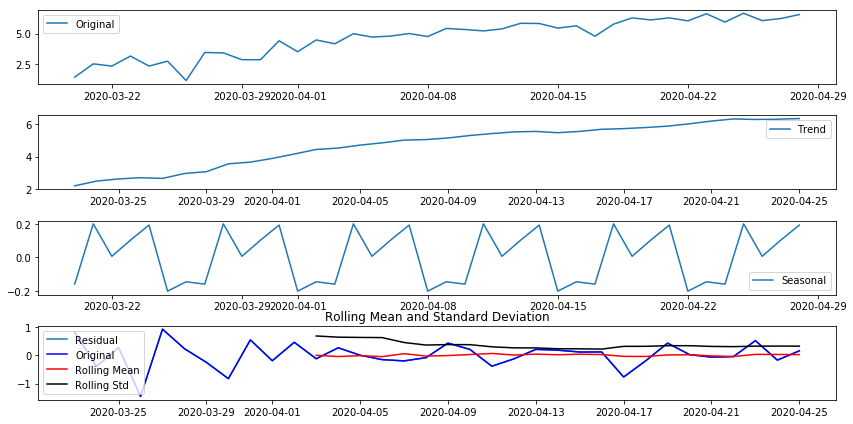

Results of Dickey-Fuller Test:
Test Statistic                -7.172638e+00
p-value                        2.778826e-10
#Lags Used                     2.000000e+00
Number of Observations Used    3.100000e+01
Critical Value (1%)           -3.661429e+00
Critical Value (5%)           -2.960525e+00
Critical Value (10%)          -2.619319e+00
dtype: float64


In [329]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_logScale, label="Original")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label="Seasonal")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label="Residual")
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

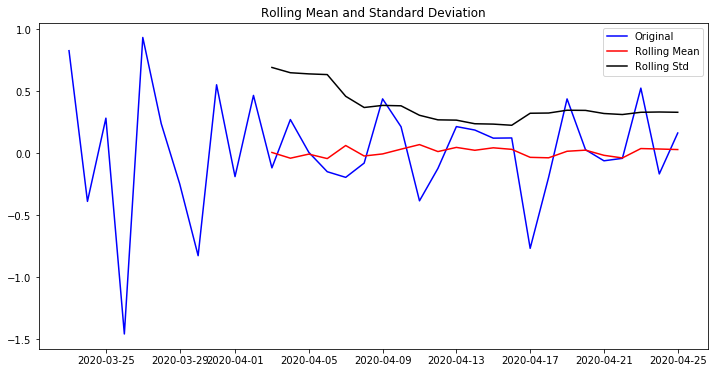

Results of Dickey-Fuller Test:
Test Statistic                -7.172638e+00
p-value                        2.778826e-10
#Lags Used                     2.000000e+00
Number of Observations Used    3.100000e+01
Critical Value (1%)           -3.661429e+00
Critical Value (5%)           -2.960525e+00
Critical Value (10%)          -2.619319e+00
dtype: float64


In [330]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


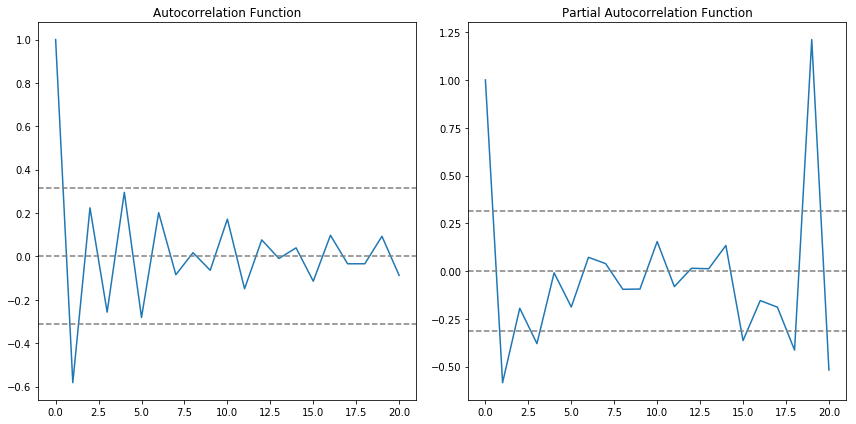

In [331]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='grey')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='grey')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='grey')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='grey')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


KeyError: 'TG'

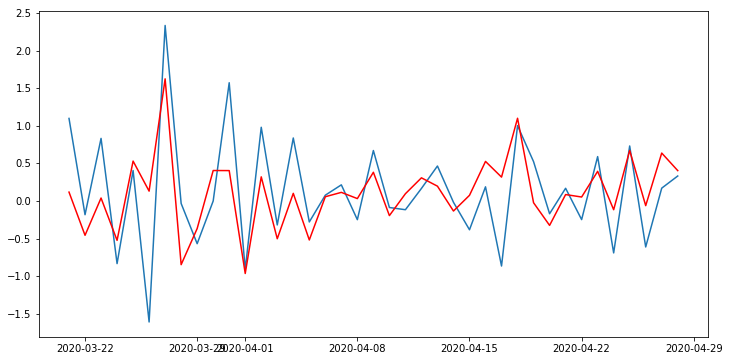

In [332]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_logScale, order = (1, 1, 1))#p,d,q
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['TG'])**2))
print('Plotting AR Model')

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


KeyError: 'TG'

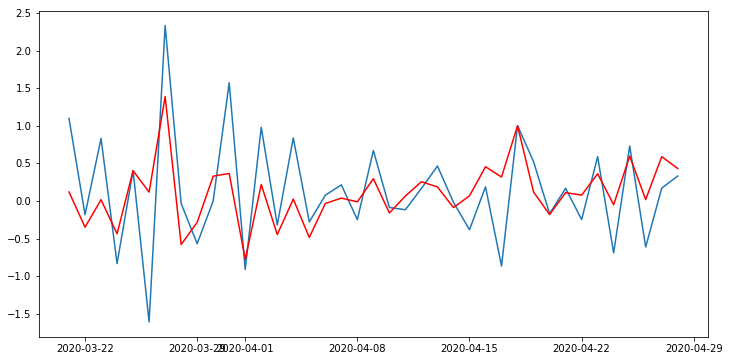

In [333]:
model = ARIMA(data_logScale, order = (0, 1, 1))#p,d,q
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['TG'])**2))
print('Plotting MA Model')

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 12.0034')

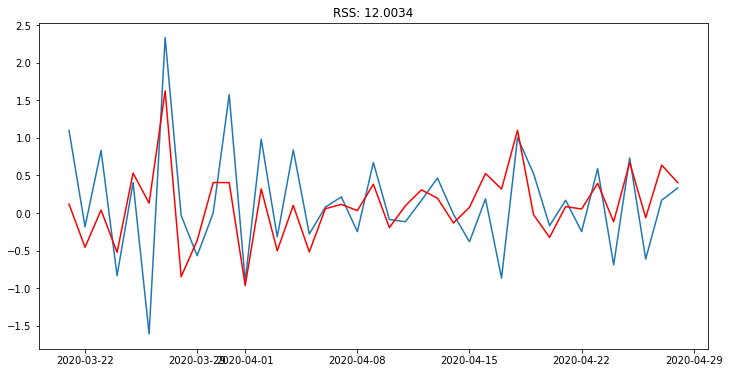

In [335]:
model = ARIMA(data_logScale, order = (1, 1, 1))#p,d,q
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['MH'])**2))

In [336]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2020-03-21    0.118296
2020-03-22   -0.456197
2020-03-23    0.039656
2020-03-24   -0.523584
2020-03-25    0.530959
dtype: float64


In [337]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2020-03-21    0.118296
2020-03-22   -0.337901
2020-03-23   -0.298245
2020-03-24   -0.821829
2020-03-25   -0.290870
dtype: float64


In [338]:
predictions_ARIMA_log = pd.Series(data_logScale['MH'].ix[0], index=data_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

C:\Users\VARUN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2020-03-20    1.386294
2020-03-21    1.504591
2020-03-22    1.048394
2020-03-23    1.088049
2020-03-24    0.564465
dtype: float64

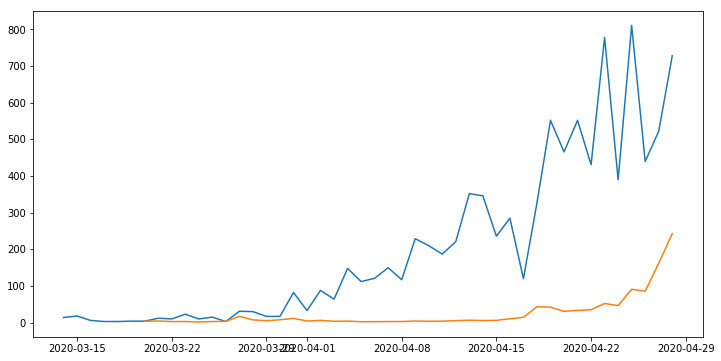

In [339]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)

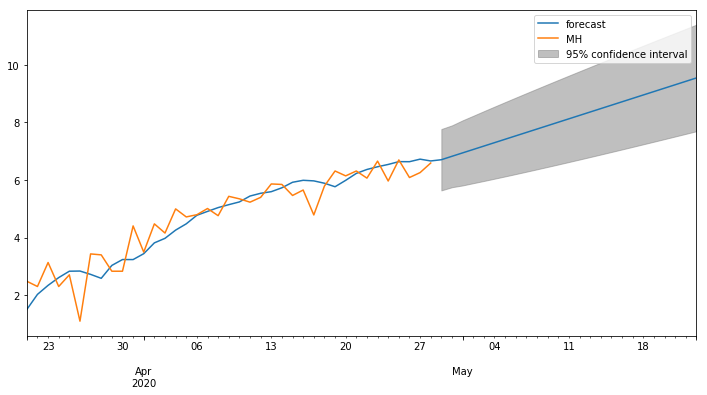

In [340]:
results_ARIMA.plot_predict(1, 64)
x=results_ARIMA.forecast(steps=120)

In [347]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(data['MH'], order=(3,1,2), seasonal_order=(3,1,2,12))
results = model.fit()

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


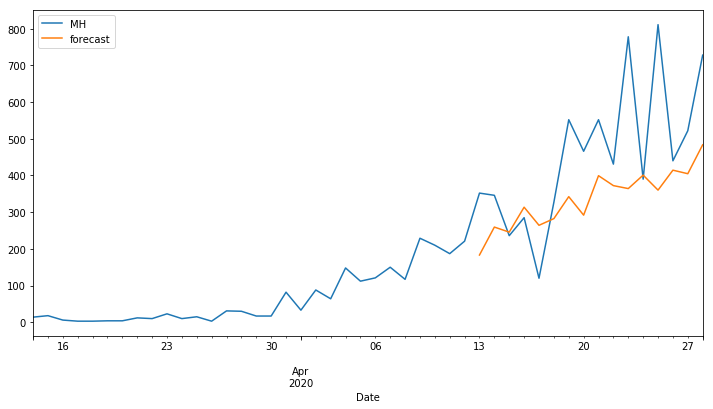

In [348]:
data['forecast'] = results.predict(start=30, end=64, dynamic=True)
data[['MH', 'forecast']].plot()